In [1]:
#Ravi Kiran Mahoorkar
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1.Tasks:

In [2]:
# Load the Excel file
excel_file = 'heart_disease.xlsx'

# Display all sheet names
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'Heart_disease']


In [3]:
# Load the "Data" sheet
df= pd.read_excel(excel_file, sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
#description
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
#null values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


# 2. Exploratory Data Analysis (EDA):

In [7]:
#fill na values
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

In [8]:
#duplicates
df.duplicated().sum()

1

In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# remove outliers

# Define a function to remove outliers from a column
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Iterate over all numerical columns and remove outliers
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df = remove_outliers(df, col)

In [11]:
# Unique vales of all object columns
# Get a list of object columns
object_cols = df.select_dtypes(include=['object']).columns

# Iterate through object columns and print unique values
for col in object_cols:
  print(f"Unique values for column '{col}': {df[col].unique()}")

Unique values for column 'sex': ['Male' 'Female']
Unique values for column 'cp': ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
Unique values for column 'restecg': ['lv hypertrophy' 'normal' 'st-t abnormality']
Unique values for column 'exang': [False True 'FALSE' 'TURE']
Unique values for column 'slope': ['downsloping' 'flat' 'upsloping']
Unique values for column 'thal': ['fixed defect' 'normal' 'reversable defect']


In [12]:
# Convert the 'exang' column to boolean values (True/False)
df['exang'] = df['exang'].replace({'FALSE': False, 'TURE': True})

# 3. Feature Engineering:

In [13]:
# label encoding on object column

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Iterate through object columns and apply label encoding
for col in df:
    df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,33,1,3,39,82,1,0,67,0,23,0,0,0
1,11,1,1,32,52,0,1,49,0,0,1,0,0
2,27,1,0,35,41,0,1,65,0,4,1,0,0
3,22,1,3,18,37,0,0,105,0,0,1,0,0
4,27,1,0,12,50,0,1,43,1,15,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,25,1,0,16,37,1,2,21,0,0,1,0,2
762,42,1,0,49,62,1,0,47,0,15,2,1,2
764,28,1,2,42,68,0,2,35,1,0,0,1,2
767,28,1,2,48,81,0,2,55,1,5,0,1,2


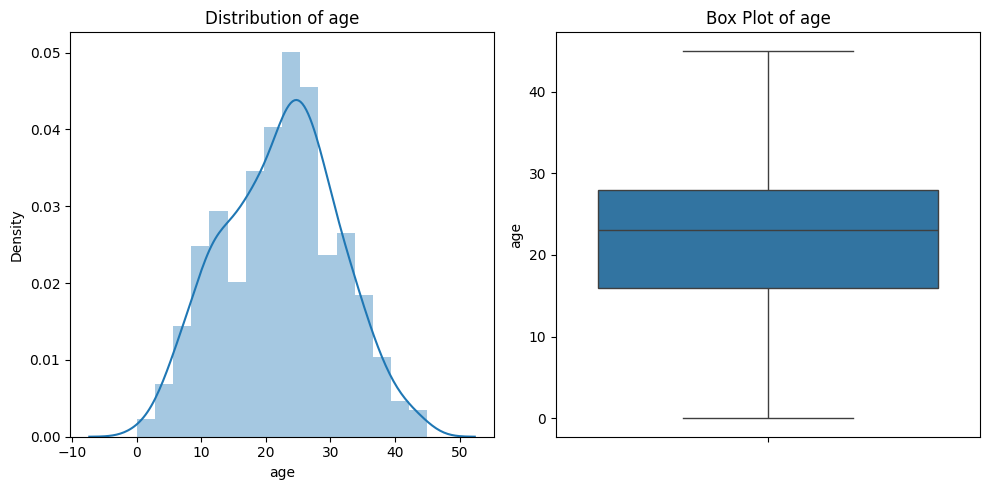

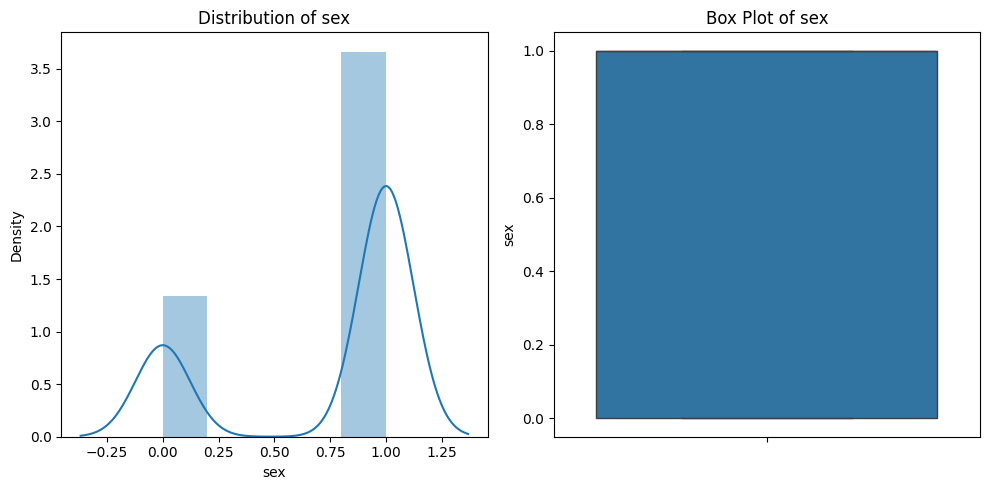

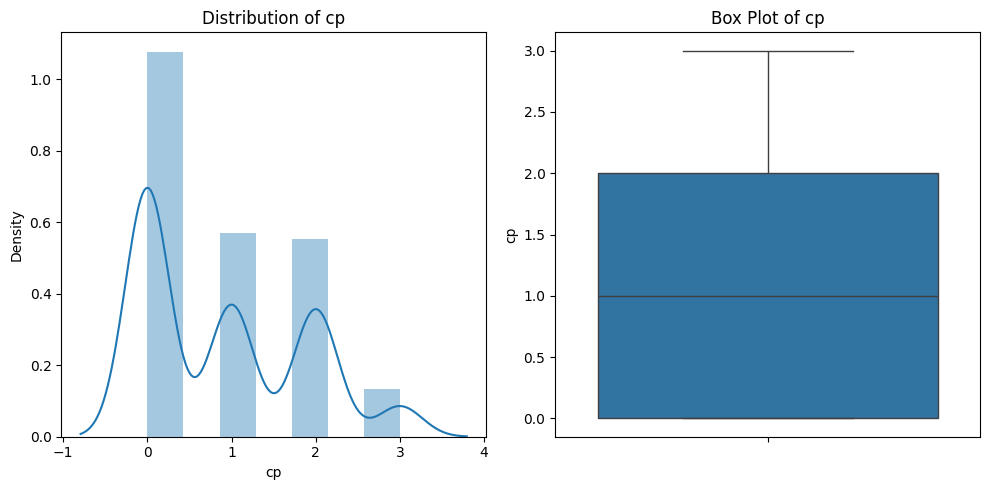

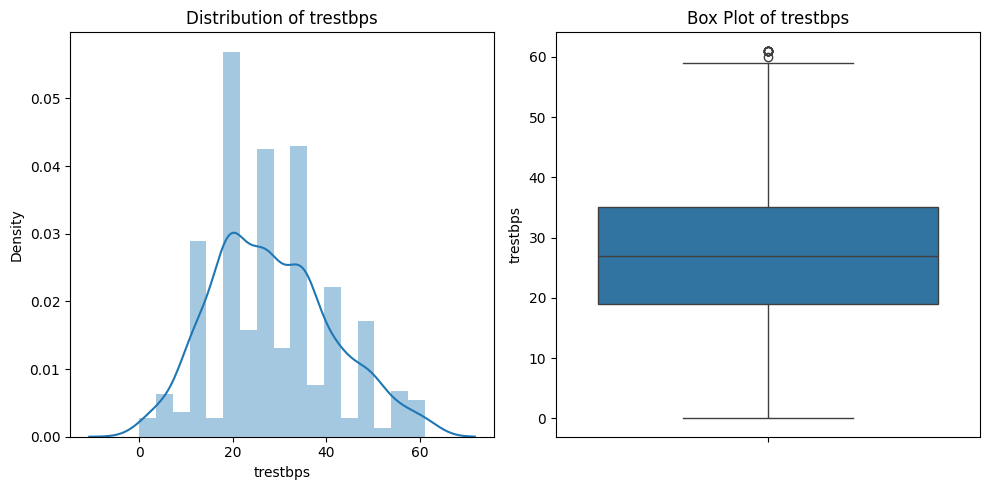

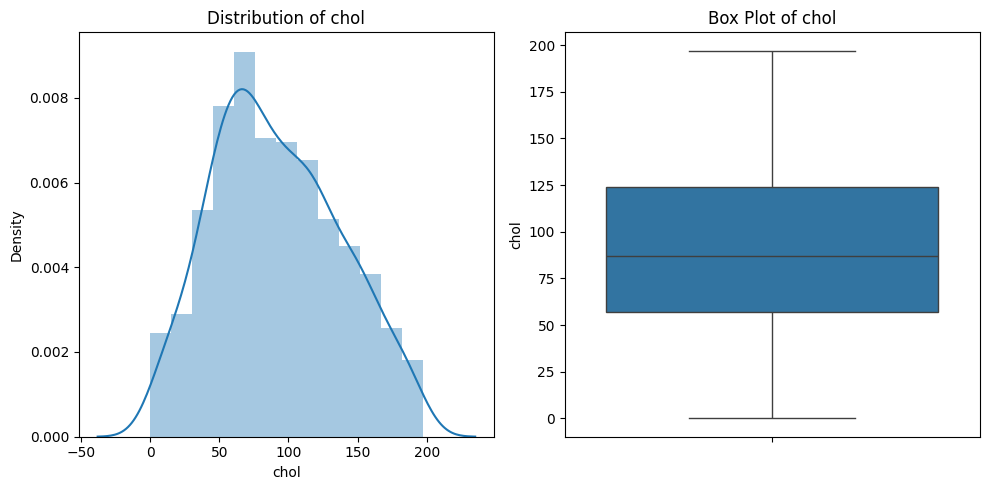

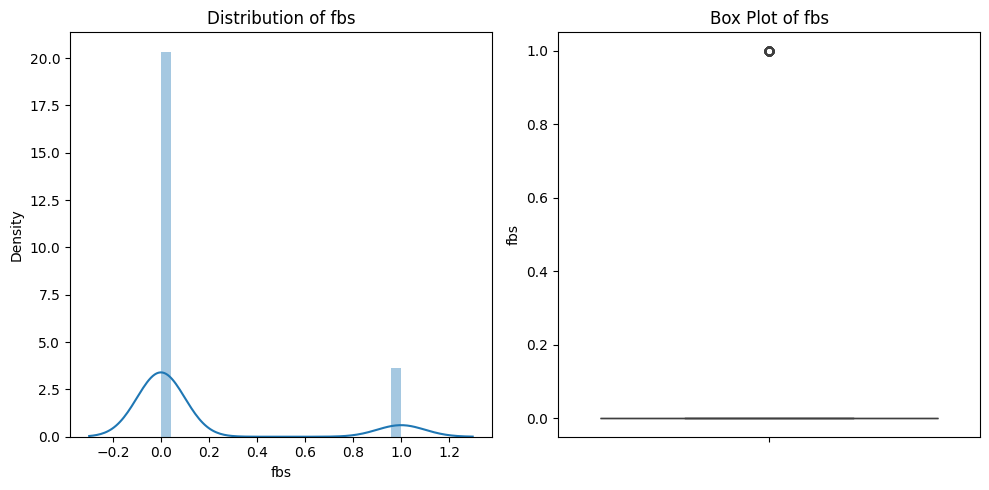

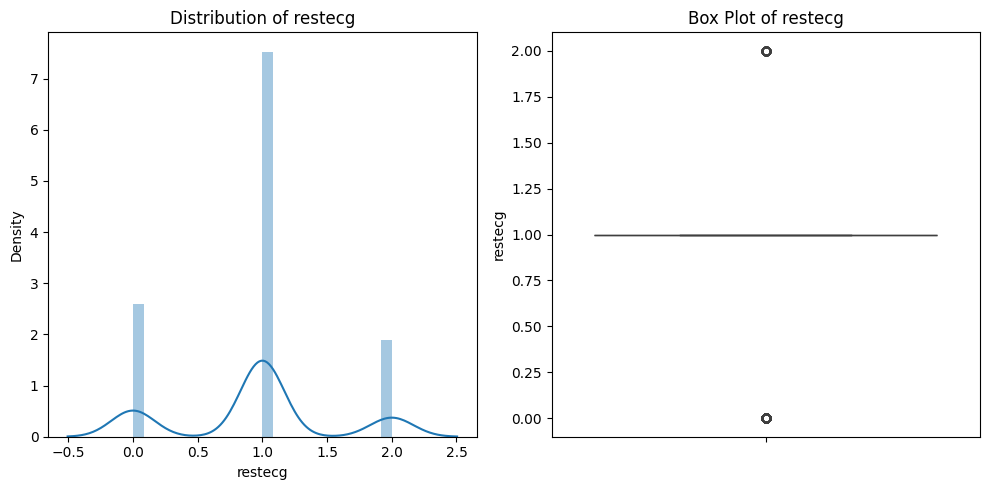

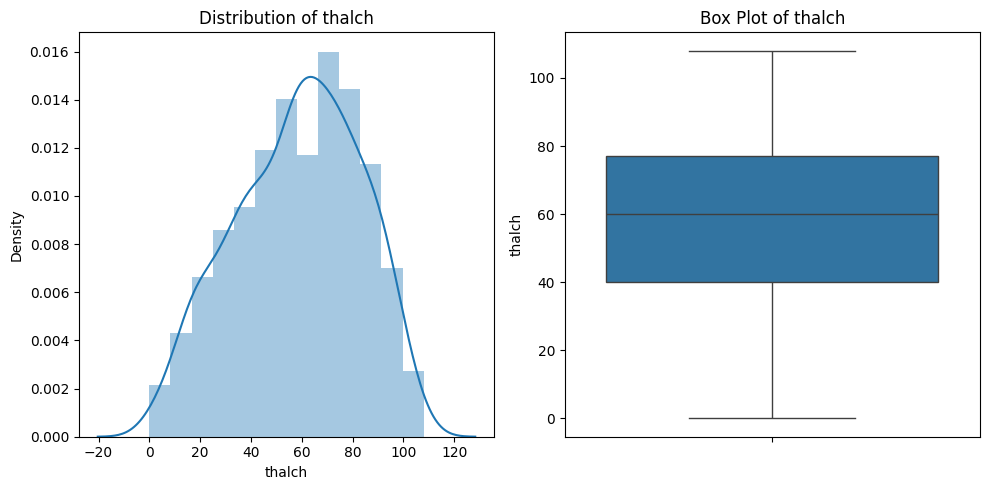

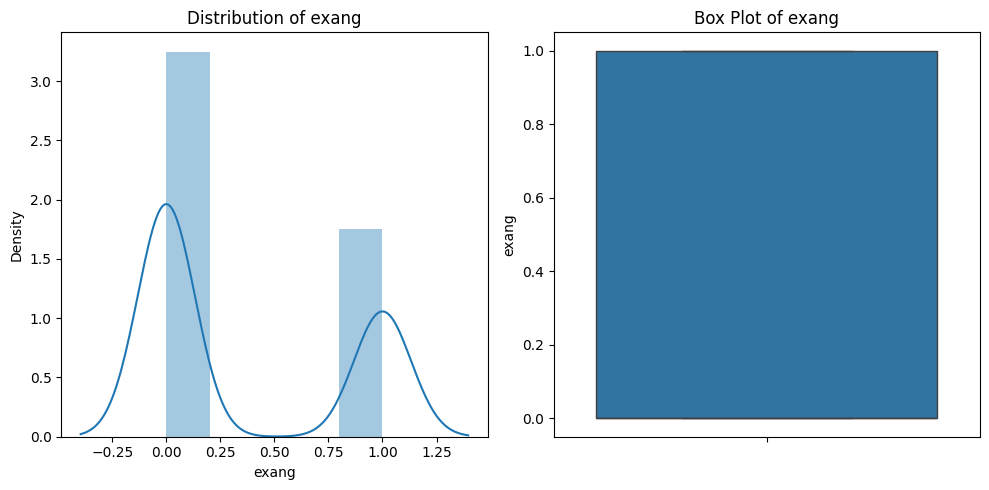

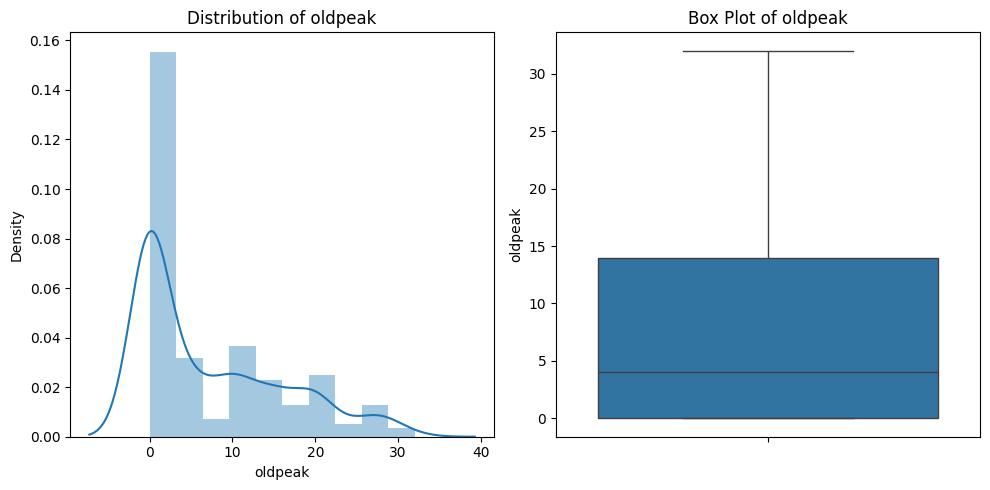

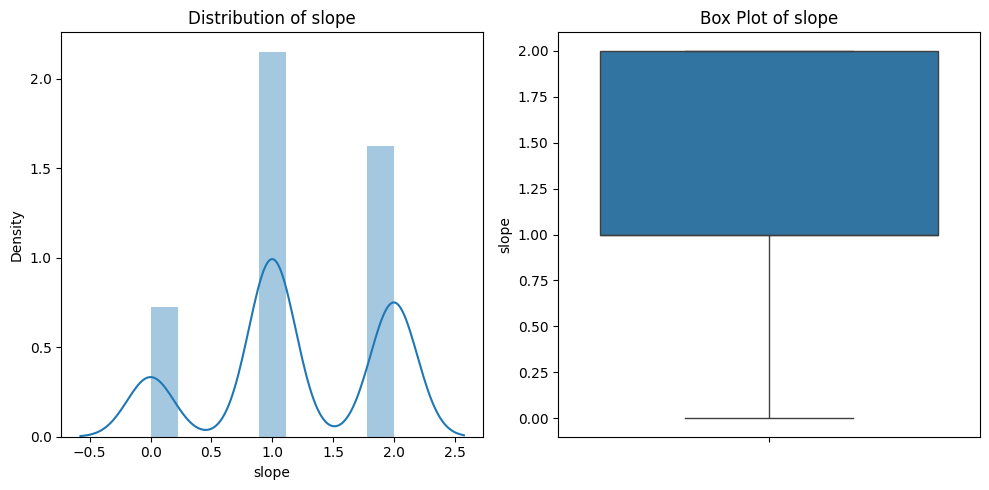

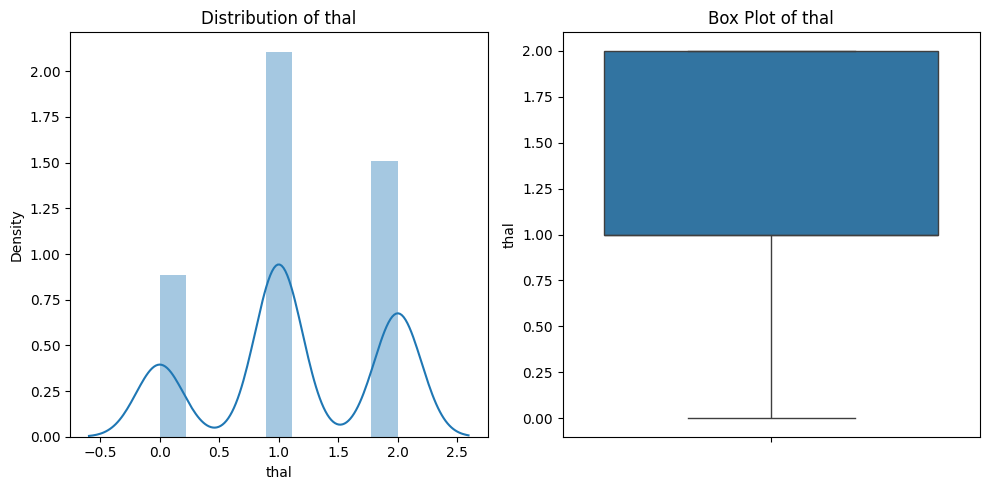

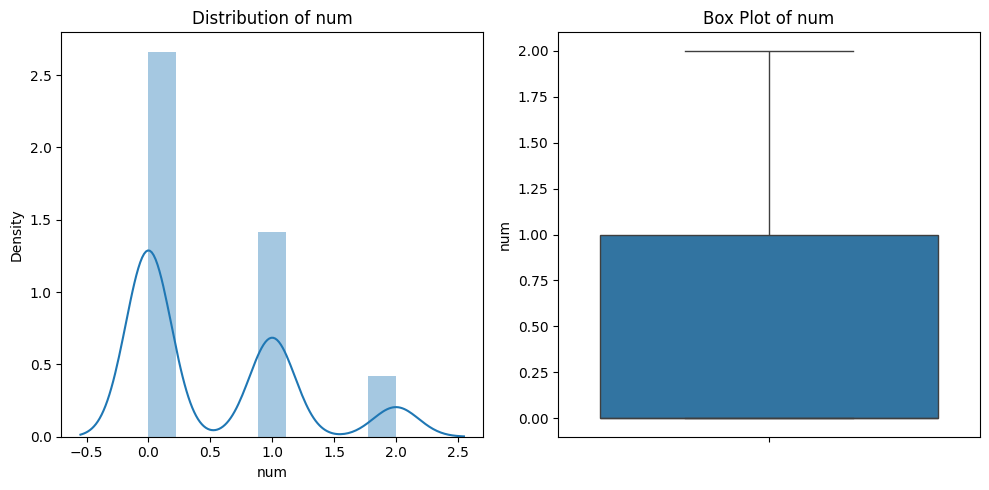

In [14]:
# creating distplot and box plot of numerical columns

# Select numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

for col in numerical_cols:
  plt.figure(figsize=(10, 5))

  # Distplot
  plt.subplot(1, 2, 1)
  sns.distplot(df[col])
  plt.title(f'Distribution of {col}')

  # Box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(y=df[col])
  plt.title(f'Box Plot of {col}')

  plt.tight_layout()
  plt.show()


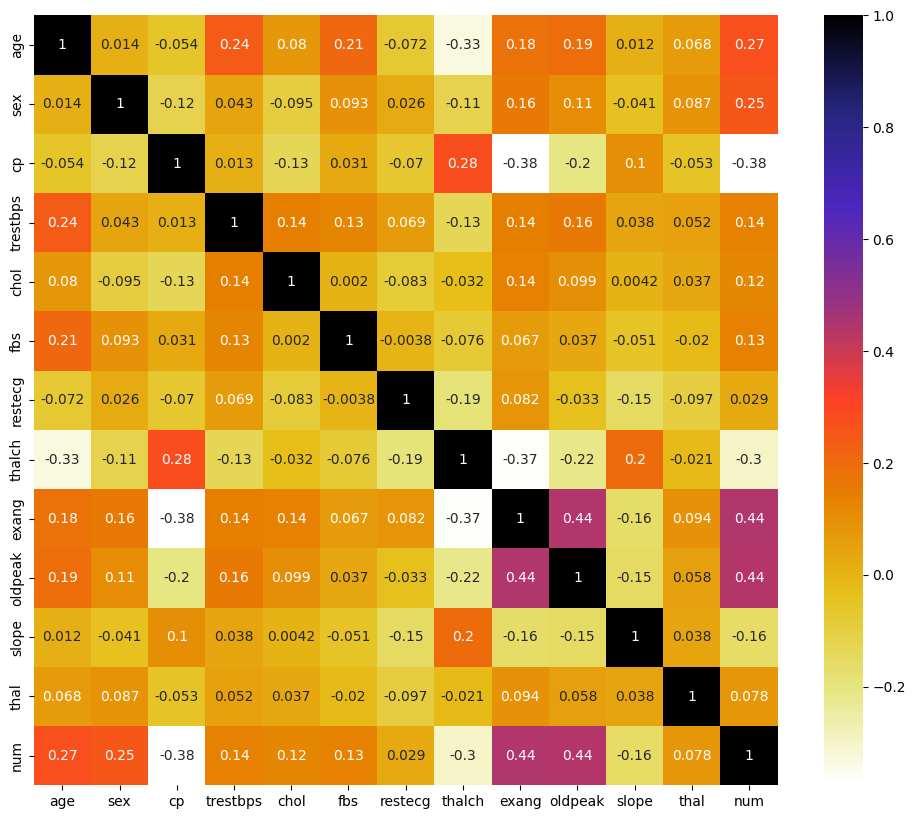

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


In [16]:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).

from sklearn.model_selection import train_test_split

# Assuming your target variable is 'target' (replace with your actual target column name)
X = df.drop('num', axis=1)
y = df['num']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Set random_state for reproducibility

# Now you have X_train, X_test, y_train, and y_test for model training and evaluation
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(493, 12) (124, 12) (493,) (124,)


# **4. Decision Tree Classification:**

# **Decision Tree model**

Building Decision Tree Classifier using Entropy Criteria

5. Hyperparameter Tuning:

In [17]:
#model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=42,min_samples_split=3)# C 5.0
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       random_state=42)

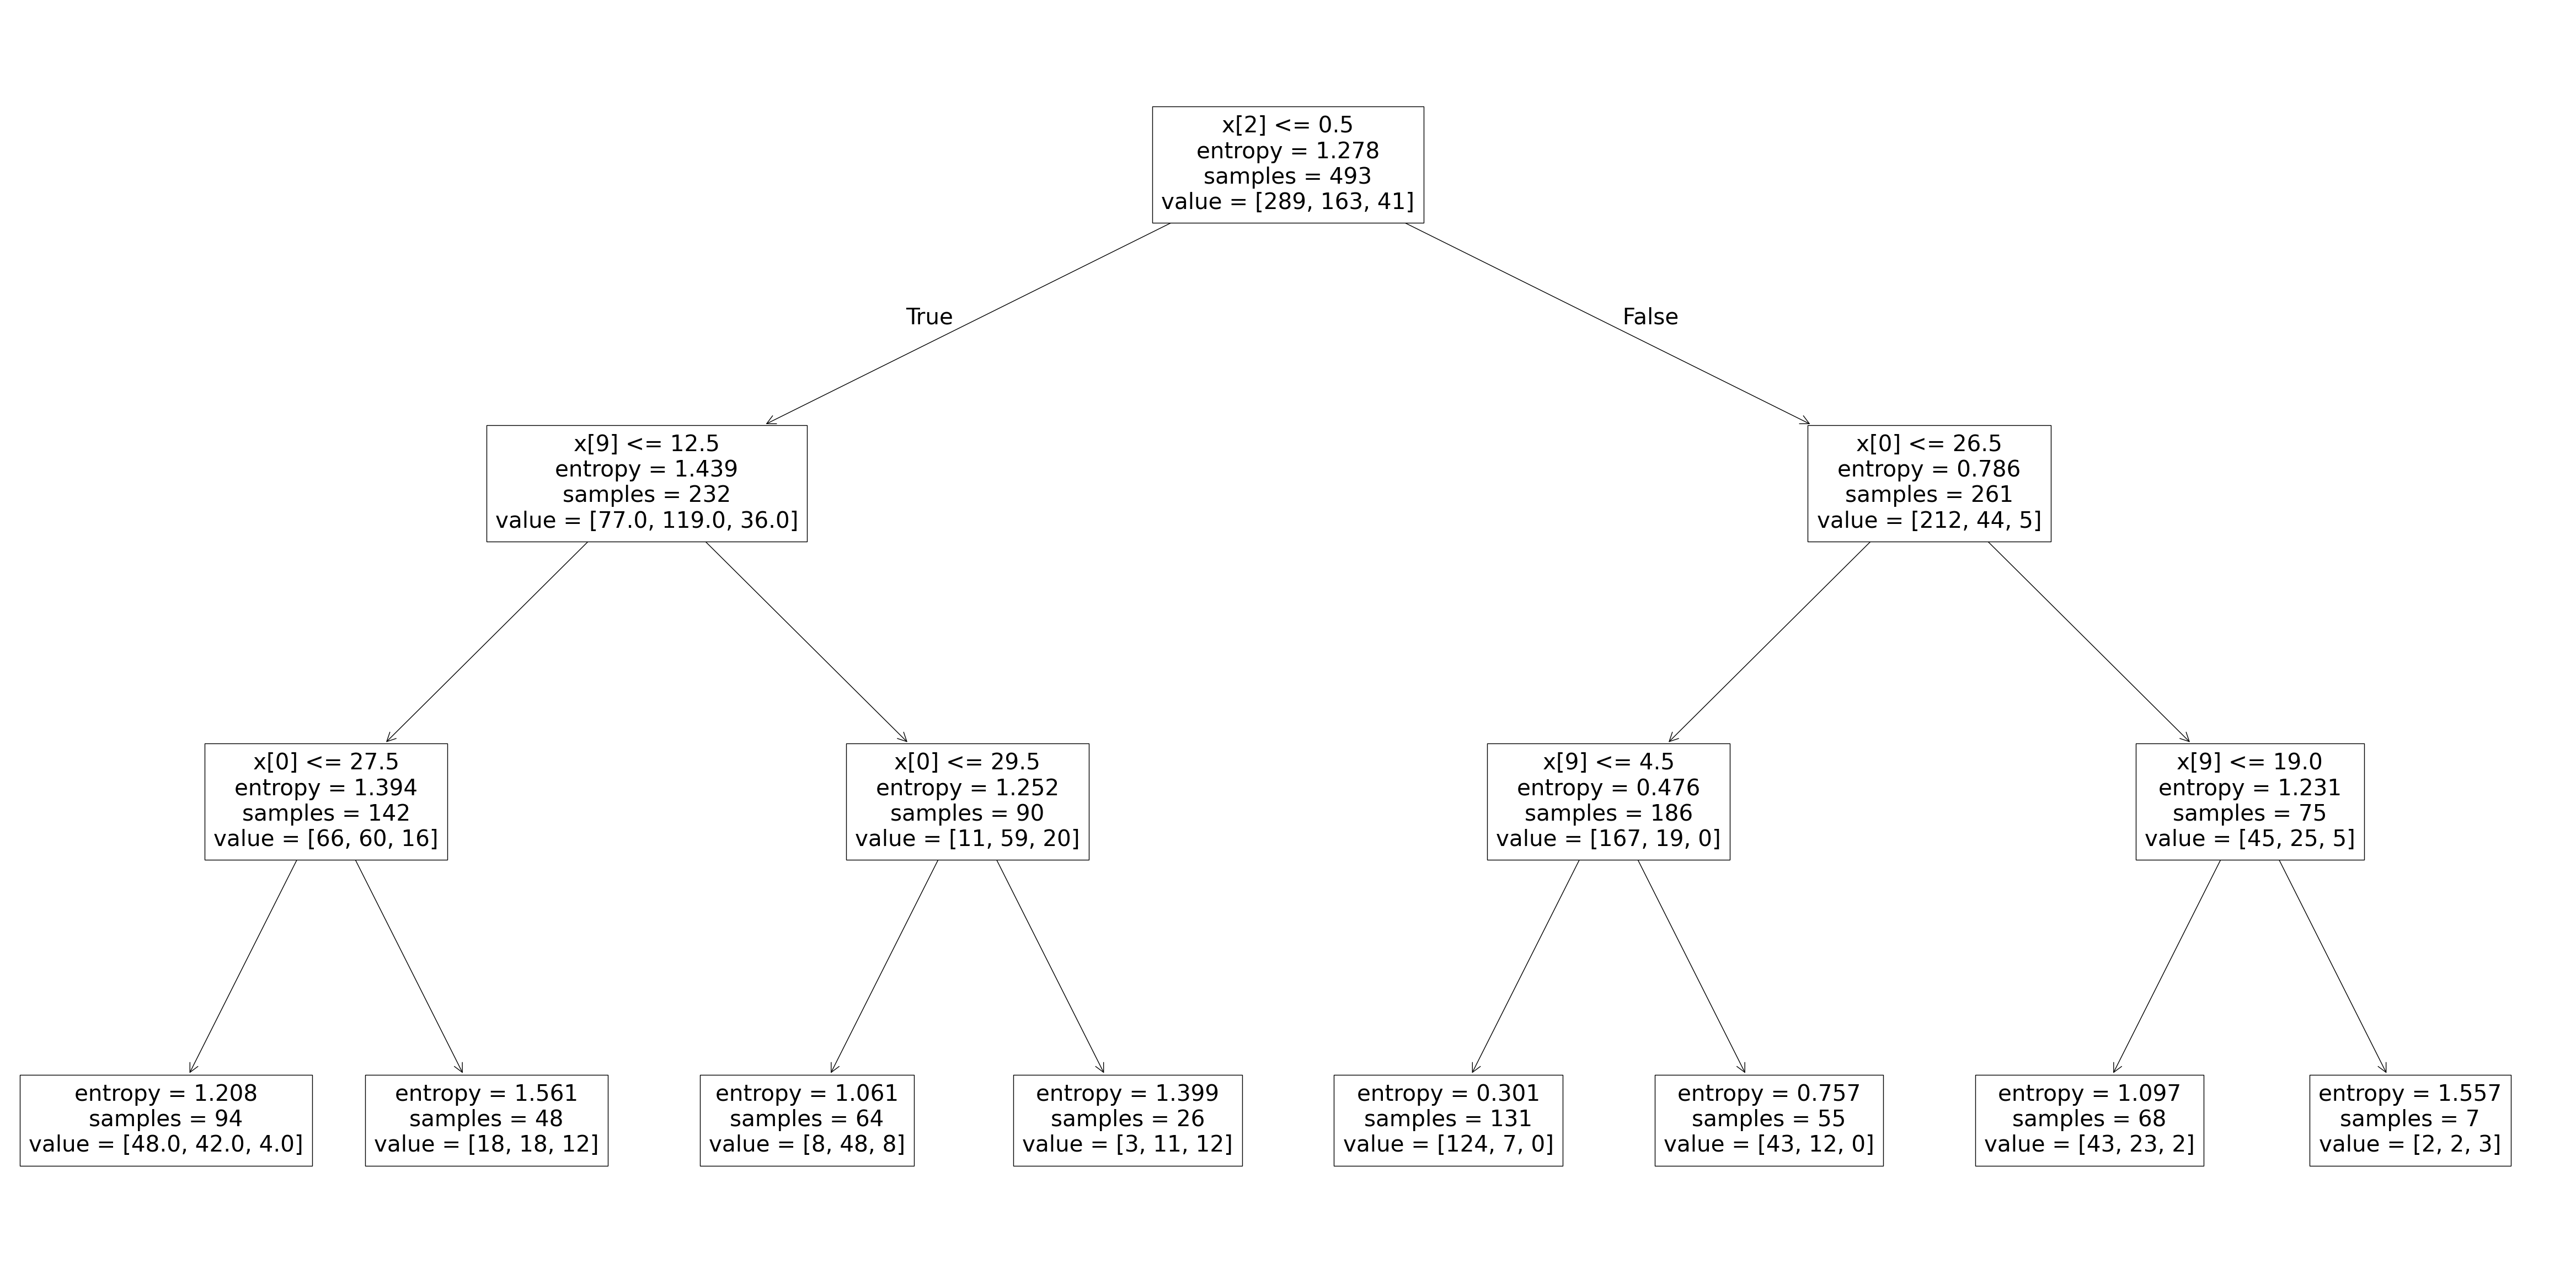

In [18]:
#PLot the decision tree
plt.figure(figsize=(60, 30))
tree.plot_tree(model);
plt.show()

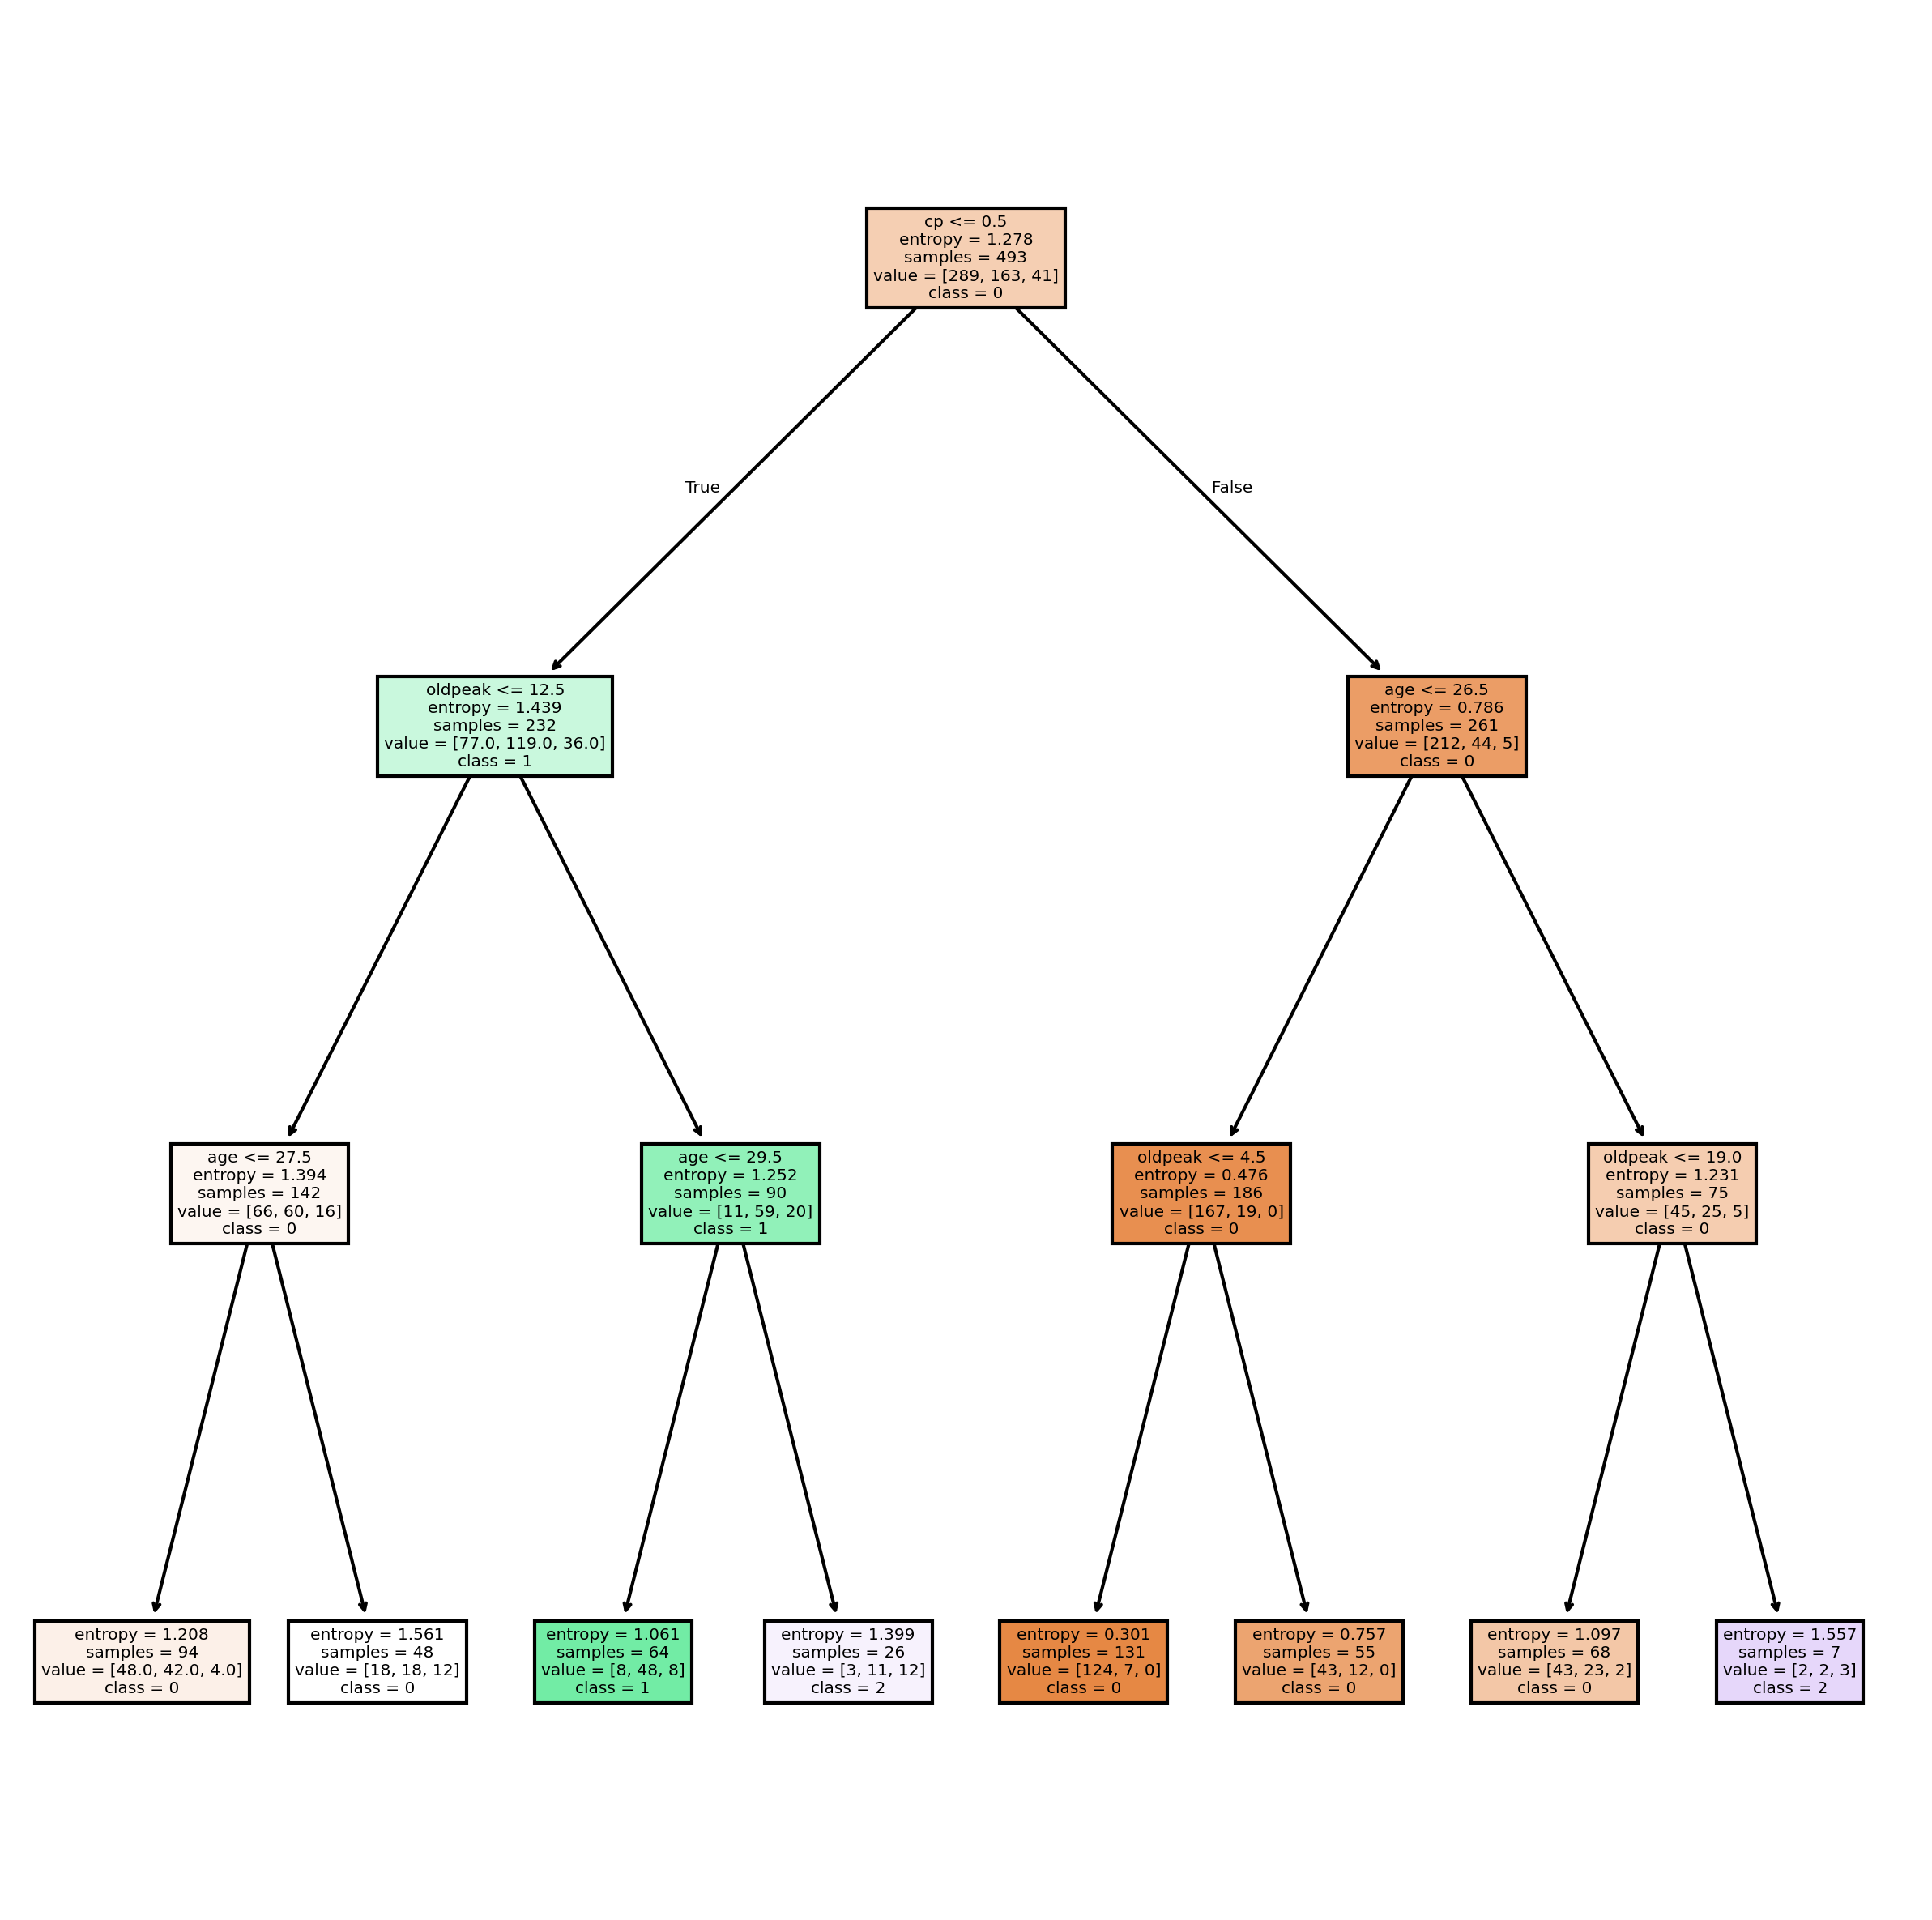

In [19]:
#model plot
fn=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch','exang', 'oldpeak', 'slope', 'thal']
cn=['0', '1', '2','3', '4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [20]:
#text tree
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_2 <= 0.50
|   |--- feature_9 <= 12.50
|   |   |--- feature_0 <= 27.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  27.50
|   |   |   |--- class: 0
|   |--- feature_9 >  12.50
|   |   |--- feature_0 <= 29.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  29.50
|   |   |   |--- class: 2
|--- feature_2 >  0.50
|   |--- feature_0 <= 26.50
|   |   |--- feature_9 <= 4.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  4.50
|   |   |   |--- class: 0
|   |--- feature_0 >  26.50
|   |   |--- feature_9 <= 19.00
|   |   |   |--- class: 0
|   |   |--- feature_9 >  19.00
|   |   |   |--- class: 2



In [21]:
#important features
model.feature_importances_

array([0.24672123, 0.        , 0.53303399, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22024478,
       0.        , 0.        ])

In [22]:
#important features
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

,0
cp,0.533034
age,0.246721
oldpeak,0.220245
sex,0.000000
trestbps,0.000000
chol,0.000000
fbs,0.000000
restecg,0.000000
thalch,0.000000
exang,0.000000


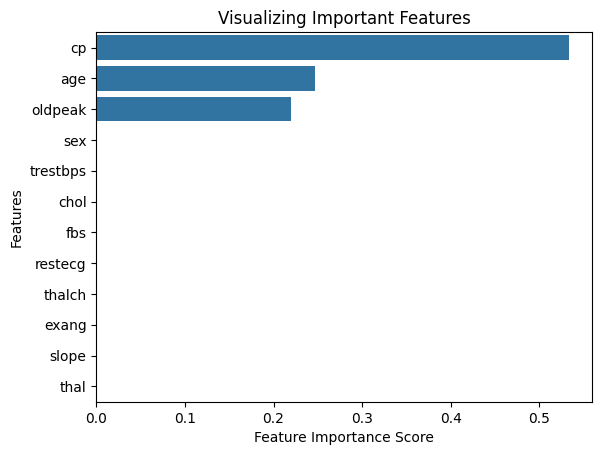

In [23]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [24]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,101
1,15
2,8


In [25]:
#prediction
preds

array([0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,1,2
num,,,
0,74,1,1
1,21,9,1
2,6,5,6


In [27]:
# Accuracy
np.mean(preds==y_test)

0.717741935483871

# 6. Model Evaluation and Analysis:

In [28]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, preds)
conf_matrix = confusion_matrix(y_test, preds)
class_report = classification_report(y_test, preds)

# Display evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.72

Confusion Matrix:
[[74  1  1]
 [21  9  1]
 [ 6  5  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.97      0.84        76
           1       0.60      0.29      0.39        31
           2       0.75      0.35      0.48        17

    accuracy                           0.72       124
   macro avg       0.69      0.54      0.57       124
weighted avg       0.70      0.72      0.68       124



# Building Decision Tree Classifier (CART) using Gini Criteria

In [29]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42, min_samples_split=2)

In [30]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [31]:
#Prediction and computing the accuracy
predd=model_gini.predict(X_test)
model.feature_importances_

array([0.24672123, 0.        , 0.53303399, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.22024478,
       0.        , 0.        ])

In [32]:
np.mean(predd==y_test)

0.7741935483870968

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, predd)
conf_matrix = confusion_matrix(y_test, predd)
class_report = classification_report(y_test, predd)

# Display evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.77

Confusion Matrix:
[[70  5  1]
 [12 19  0]
 [ 2  8  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.88        76
           1       0.59      0.61      0.60        31
           2       0.88      0.41      0.56        17

    accuracy                           0.77       124
   macro avg       0.77      0.65      0.68       124
weighted avg       0.78      0.77      0.76       124



# Decision Tree Regression

In [34]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42,min_samples_split=3)
model_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=3, random_state=42)

In [35]:
#Prediction and computing the accuracy
predr=model_reg.predict(X_test)
model_reg.feature_importances_

array([0.0999777 , 0.01463605, 0.4173739 , 0.        , 0.05785199,
       0.00689355, 0.03381351, 0.12694601, 0.0065144 , 0.16343976,
       0.05410843, 0.0184447 ])

In [36]:
#Find the testing accuracy
model.score(X_test,y_test)

0.717741935483871

# Interview Questions:

In [37]:
#  summary of these  models
'''
The code trains and evaluates three different decision tree models on a heart disease dataset:

1. **Decision Tree Classifier (Entropy):** This model uses the entropy criterion for splitting nodes and has a maximum depth of 3.
The code visualizes the tree, displays feature importances, and evaluates its performance using accuracy, confusion matrix, and classification report.

2. **Decision Tree Classifier (Gini):**  Similar to the first model, but it uses the Gini impurity criterion for splitting nodes and
 has a maximum depth of 7. It also provides accuracy, confusion matrix, and classification report for evaluation.

3. **Decision Tree Regressor:** This model uses a decision tree for regression,
aiming to predict a continuous target variable (in this case, it seems the same target variable as the classification models
but treated as a continuous value).  It has a maximum depth of 5. The code calculates the R-squared score (model.score) on the test set.
Note that R-squared is used for evaluating regression models, not classification models.
'''

'\nThe code trains and evaluates three different decision tree models on a heart disease dataset:\n\n1. **Decision Tree Classifier (Entropy):** This model uses the entropy criterion for splitting nodes and has a maximum depth of 3.  \nThe code visualizes the tree, displays feature importances, and evaluates its performance using accuracy, confusion matrix, and classification report.\n\n2. **Decision Tree Classifier (Gini):**  Similar to the first model, but it uses the Gini impurity criterion for splitting nodes and\n has a maximum depth of 7. It also provides accuracy, confusion matrix, and classification report for evaluation.\n\n3. **Decision Tree Regressor:** This model uses a decision tree for regression, \naiming to predict a continuous target variable (in this case, it seems the same target variable as the classification models \nbut treated as a continuous value).  It has a maximum depth of 5. The code calculates the R-squared score (model.score) on the test set.  \nNote that R

In [38]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
'''
Maximum Depth (max_depth):
Limits how deep the tree can grow. Higher values increase complexity (risk of overfitting); lower values simplify the model (risk of underfitting).

Minimum Samples Split (min_samples_split):
The minimum samples needed to split a node. Larger values reduce overfitting by limiting splits; smaller values allow more flexibility.

Minimum Samples Leaf (min_samples_leaf):
The minimum samples required in a leaf node. Larger values make the tree more conservative; smaller values increase granularity and risk overfitting.

Maximum Features (max_features):
The number of features to consider at each split. Lower values reduce complexity but may miss key splits; higher values increase complexity and computation.

Maximum Leaf Nodes (max_leaf_nodes):
Restricts the number of leaf nodes. Fewer nodes prevent overfitting; more nodes capture finer details in the data.

Criterion (criterion):
Determines the function to measure split quality (e.g., Gini or entropy for classification).
Different criteria can affect tree structure and performance.
'''

'\nMaximum Depth (max_depth):\nLimits how deep the tree can grow. Higher values increase complexity (risk of overfitting); lower values simplify the model (risk of underfitting).\n\nMinimum Samples Split (min_samples_split):\nThe minimum samples needed to split a node. Larger values reduce overfitting by limiting splits; smaller values allow more flexibility.\n\nMinimum Samples Leaf (min_samples_leaf):\nThe minimum samples required in a leaf node. Larger values make the tree more conservative; smaller values increase granularity and risk overfitting.\n\nMaximum Features (max_features):\nThe number of features to consider at each split. Lower values reduce complexity but may miss key splits; higher values increase complexity and computation.\n\nMaximum Leaf Nodes (max_leaf_nodes):\nRestricts the number of leaf nodes. Fewer nodes prevent overfitting; more nodes capture finer details in the data.\n\nCriterion (criterion):\nDetermines the function to measure split quality (e.g., Gini or en

In [39]:
#2. What is the difference between the Label encoding and One-hot encoding?
'''
Label Encoding:

Definition: Assigns a unique integer to each category in the data.
For example: {'Red': 0, 'Green': 1, 'Blue': 2}.
Use Case: Suitable for ordinal data where categories have an inherent order.
Drawback: Can mislead models for nominal data because it introduces an artificial ordinal relationship.

One-Hot Encoding:

Definition: Converts each category into a binary vector, where each category is represented by a separate column.
For example: {'Red', 'Green', 'Blue'} becomes [1, 0, 0], [0, 1, 0], [0, 0, 1].
Use Case: Ideal for nominal data with no inherent order among categories.
Drawback: Can result in high dimensionality if the number of categories is large.
'''

"\nLabel Encoding:\n\nDefinition: Assigns a unique integer to each category in the data.\nFor example: {'Red': 0, 'Green': 1, 'Blue': 2}.\nUse Case: Suitable for ordinal data where categories have an inherent order.\nDrawback: Can mislead models for nominal data because it introduces an artificial ordinal relationship.\n\nOne-Hot Encoding:\n\nDefinition: Converts each category into a binary vector, where each category is represented by a separate column.\nFor example: {'Red', 'Green', 'Blue'} becomes [1, 0, 0], [0, 1, 0], [0, 0, 1].\nUse Case: Ideal for nominal data with no inherent order among categories.\nDrawback: Can result in high dimensionality if the number of categories is large.\n"